# Introduction to TensorFlow

## Week 1

In [20]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
model = keras.Sequential([keras.layers.Dense(units=1,input_shape=[1])])
model.compile(optimizer='sgd',loss='mean_squared_error')

In [15]:
xs = np.array([-1,0,1,2,3,4],dtype=float)
ys = np.array([-3,-1,1,3,5,7],dtype=float)

In [17]:
model.fit(xs,ys,epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 253ms/step - loss: 20.1900
Epoch 2/500
1/1 [==============================] - 0s 8ms/step - loss: 16.1517
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 12.9692
Epoch 4/500
1/1 [==============================] - 0s 0s/step - loss: 10.4599
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 8.4805
Epoch 6/500
1/1 [==============================] - 0s 0s/step - loss: 6.9180
Epoch 7/500
1/1 [==============================] - 0s 14ms/step - loss: 5.6836
Epoch 8/500
1/1 [==============================] - 0s 6ms/step - loss: 4.7076
Epoch 9/500
1/1 [==============================] - 0s 10ms/step - loss: 3.9348
Epoch 10/500
1/1 [==============================] - 0s 0s/step - loss: 3.3221
Epoch 11/500
1/1 [==============================] - 0s 0s/step - loss: 2.8354
Epoch 12/500
1/1 [==============================] - 0s 10ms/step - loss: 2.4479
Epoch 13/500
1/1 [==============================] - 0s 

In [19]:
model.predict([10.0])

1/1 [==============================] - 0s 84ms/step


array([[18.980629]], dtype=float32)

## Week 2

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
fashion = tf.keras.datasets.fashion_mnist
(train_x,train_y),(test_x,test_y)= fashion.load_data()

4422102/4422102 [==============================] - 10s 2us/step


Label:0

Image Pixel Array:
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  3

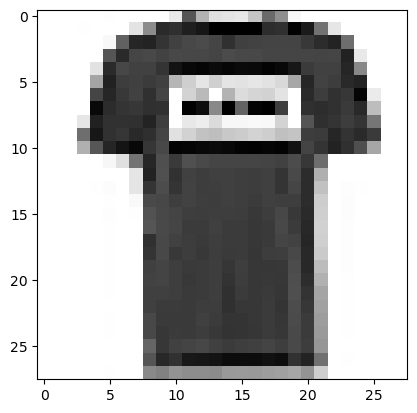

In [16]:
index = 1
np.set_printoptions(linewidth=320)
print(f'Label:{train_y[index]}')
print(f'\nImage Pixel Array:\n{train_x[index]}')
plt.imshow(train_x[index],cmap='Greys')

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [17]:
train_x = train_x/255.0
test_x= test_x/255.0

In [20]:
model.compile(optimizer=tf.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_x,train_y,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4929 - accuracy: 0.8268
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3734 - accuracy: 0.8644
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3359 - accuracy: 0.8767
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3126 - accuracy: 0.8859
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2927 - accuracy: 0.8923


In [21]:
model.evaluate(test_x,test_y)

313/313 [==============================] - 3s 9ms/step - loss: 0.3688 - accuracy: 0.8654


[0.36882877349853516, 0.8654000163078308]

In [24]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('loss')<0.4):
            self.model.stop_training= True

In [25]:
callbacks = myCallback()

In [26]:
model.fit(train_x,train_y,epochs=5,callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2790 - accuracy: 0.8964


In [27]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(input_shape=(28,28)),
tf.keras.layers.Dense(128,activation='relu'),
tf.keras.layers.Dense(10,activation='softmax')
])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [29]:
model.compile(optimizer=tf.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_x,train_y,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4333 - accuracy: 0.8429
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2966 - accuracy: 0.8908
Epoch 3/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2500 - accuracy: 0.9082
Epoch 4/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2199 - accuracy: 0.9173
Epoch 5/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1936 - accuracy: 0.9272


In [30]:
model.evaluate(test_x,test_y)

313/313 [==============================] - 2s 6ms/step - loss: 0.2423 - accuracy: 0.9113


[0.24228604137897491, 0.911300003528595]

1/1 [==============================] - 0s 14ms/step


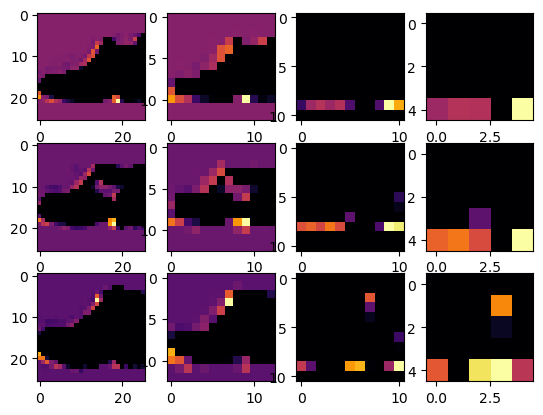

In [32]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_x[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_x[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_x[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

## Week 3

In [41]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
train_dir = 'horse-or-human'
validation_dir = 'horse-or-human'
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1/255)an'

In [32]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1/255)

In [33]:
train_generator = train_datagen.flow_from_directory(
train_dir,
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

Found 1028 images belonging to 2 classes.


In [34]:
validation_generator = validation_datagen.flow_from_directory(
validation_dir,
    target_size=(300,300),
    batch_size=32,
    class_mode='binary'
)

Found 1028 images belonging to 2 classes.


In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 35, 35, 64)      

In [21]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [37]:
history = model.fit(
train_generator,
    steps_per_epoch=8,
    epochs=15,
    validation_data = validation_generator,
    validation_steps=8,
    verbose=2
)

Epoch 1/15
8/8 - 20s - loss: 0.9588 - accuracy: 0.5544 - val_loss: 0.6602 - val_accuracy: 0.4648 - 20s/epoch - 2s/step
Epoch 2/15
8/8 - 17s - loss: 0.6881 - accuracy: 0.6411 - val_loss: 0.6291 - val_accuracy: 0.7617 - 17s/epoch - 2s/step
Epoch 3/15
8/8 - 18s - loss: 0.5838 - accuracy: 0.7489 - val_loss: 0.5007 - val_accuracy: 0.8906 - 18s/epoch - 2s/step
Epoch 4/15
8/8 - 18s - loss: 0.3740 - accuracy: 0.8656 - val_loss: 0.4213 - val_accuracy: 0.7383 - 18s/epoch - 2s/step
Epoch 5/15
8/8 - 18s - loss: 0.5041 - accuracy: 0.7789 - val_loss: 0.3455 - val_accuracy: 0.8477 - 18s/epoch - 2s/step
Epoch 6/15
8/8 - 18s - loss: 0.1964 - accuracy: 0.9300 - val_loss: 0.0946 - val_accuracy: 0.9727 - 18s/epoch - 2s/step
Epoch 7/15
8/8 - 19s - loss: 0.0839 - accuracy: 0.9700 - val_loss: 0.0898 - val_accuracy: 0.9766 - 19s/epoch - 2s/step
Epoch 8/15
8/8 - 18s - loss: 0.2736 - accuracy: 0.8944 - val_loss: 0.1398 - val_accuracy: 0.9648 - 18s/epoch - 2s/step
Epoch 9/15
8/8 - 18s - loss: 0.0639 - accuracy: 

In [ ]:
import numpy as np
import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
    # predicting images
    path = '/content/' + fn
    img = load_img(path, target_size=(300, 300))
    x = img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(fn + " is a human")
    else:
        print(fn + " is a horse")